# Perkenalan

Dibuat Oleh Arry Pandowo, student Full Stack Data Science Batch 01 Hacktiv8

> ### Data yang digunakan
Data yang digunakan adalah heart Failure Prediction yang bersumber [dimari]('https://www.kaggle.com/andrewmvd/heart-failure-clinical-data') yang merupakan dataset yang digunakan untuk membuat predictive model berdasarkan Cardiovascular Disease (CVDs). Feature yang dapat digunakan pada dataset ini adalah risiko perilaku sehari hari yang dimiliki oleh penderita CVDs secara umum data diabetes, tekanan darah dan beberapa data lainnya 

> ### Tujuan yang ingin dicapai
<ol>
<li>melihat hubungan antar feature didalam data</li>
<li>membuat model predictive dengan model Random Forest dan Boosting menggunakan dataset </li>
<li>mengeksplor kemampuan dari model yang akan digunakan</li>
<ol/>

**<em>Disclaimer</em>**
>  **informasi yang digunakan hanyalah berasal dari halaman dataset**


# Library

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import subplot
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Loading

In [43]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Data Description

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [45]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Skewness Score

In [46]:
for columns in df:
    print('Nilai Skewness ' + columns + ' adalah', df[columns].skew())

Nilai Skewness age adalah 0.42306190672863536
Nilai Skewness anaemia adalah 0.2782606644055605
Nilai Skewness creatinine_phosphokinase adalah 4.463110084653752
Nilai Skewness diabetes adalah 0.3339286842537603
Nilai Skewness ejection_fraction adalah 0.5553827516973211
Nilai Skewness high_blood_pressure adalah 0.6267318547287857
Nilai Skewness platelets adalah 1.4623208382757793
Nilai Skewness serum_creatinine adalah 4.455995882049026
Nilai Skewness serum_sodium adalah -1.0481360160574988
Nilai Skewness sex adalah -0.6267318547287857
Nilai Skewness smoking adalah 0.770348815438949
Nilai Skewness time adalah 0.12780264559841184
Nilai Skewness DEATH_EVENT adalah 0.7703488154389491


Sesuai dengan deskprisi berikut mengenai skewness score : 

* Jika Skewness Score berada antara -0,5 dan 0,5, datanya cukup simetris.
* Jika Skewness Score berada antara -1 dan -0,5 (miring negatif) atau antara 0,5 dan 1 (miring positif), datanya miring sedang.
* Jika Skewness Score berada  kurang dari -1 (kecondongan negatif) atau lebih besar dari 1 (kecondongan positif), data sangat miring.

dengan begitu ke 4 feature berikut memerlukan analisis lebih lanjut terkait dengan skor skewness diatas, berikut histplot dari ke 4 data dimaksud

In [47]:
cols = list(df[['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']].columns)

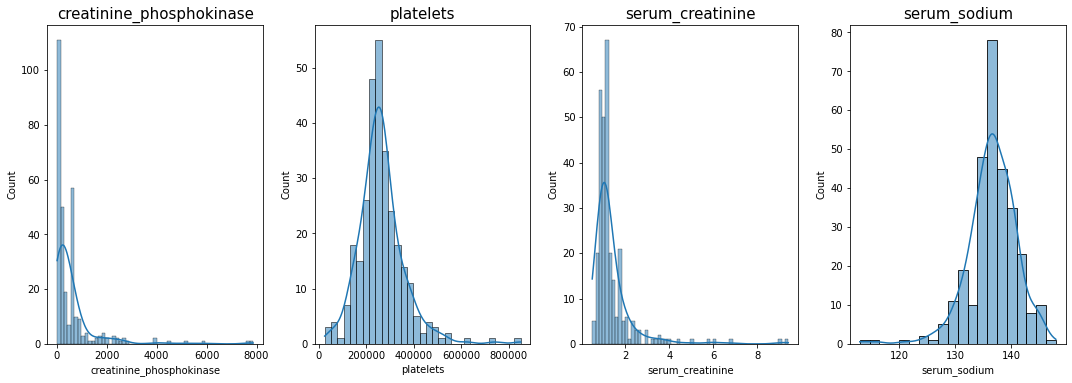

In [48]:
plt.figure(figsize = (15, 10))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 4, i + 1)
    sns.histplot(df[cols[i]], kde=True)
    plt.title(cols[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

# Data Cleaning

## Konversi age menjadi integer

In [49]:
df['age'] = df['age'].astype(int)

diubah menjadi integer untuk mempermudah visualisasi dan pemrosesan data

# Eksplorasi Data

## Boxplot Data Skewed

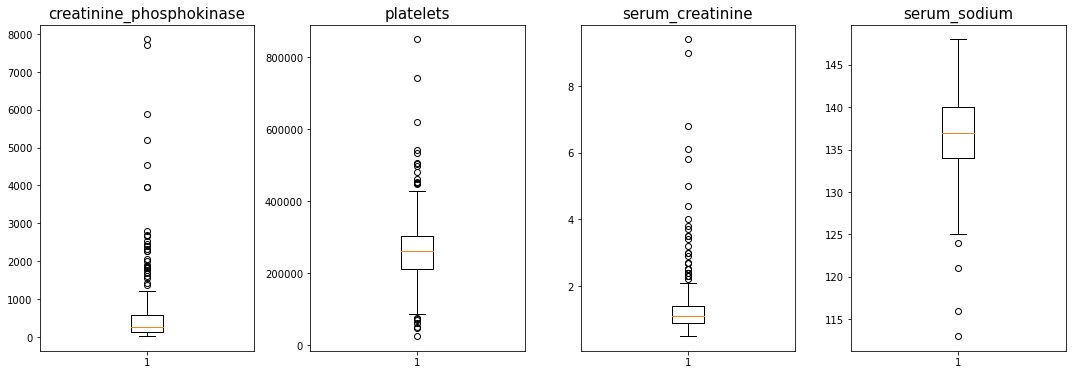

In [50]:
plt.figure(figsize = (15, 10))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 4, i + 1)
    plt.boxplot(df[cols[i]], vert=True)
    plt.title(cols[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

Kesimpulan dari Skor Skewness & Boxplot

* beberapa data memiliki skewness dalam kategori ekstrim dengan jumlah yang cukup signifikan
* hal ini dapat mengakibatkan buruknya predictive model apabila model yang digunakan sensitif terhadap data outlier
* model Random Forest terkenal dengan kapabilitas dalam mengolah data outlier
* Gradient Boosting tidak memiliki performance yang cukup baik dalam menghadapi data outlier

**Tindakan**
> untuk mengetahui performance kedua model dalam menghadapi data outlier dan moderate target imbalance, maka diputuskan untuk tidak dilakukan tindakan atas outlier pada ke 4 feature diatas

## Survivability dilihat dari skor diabetes dan umur

<AxesSubplot:xlabel='age', ylabel='diabetes'>

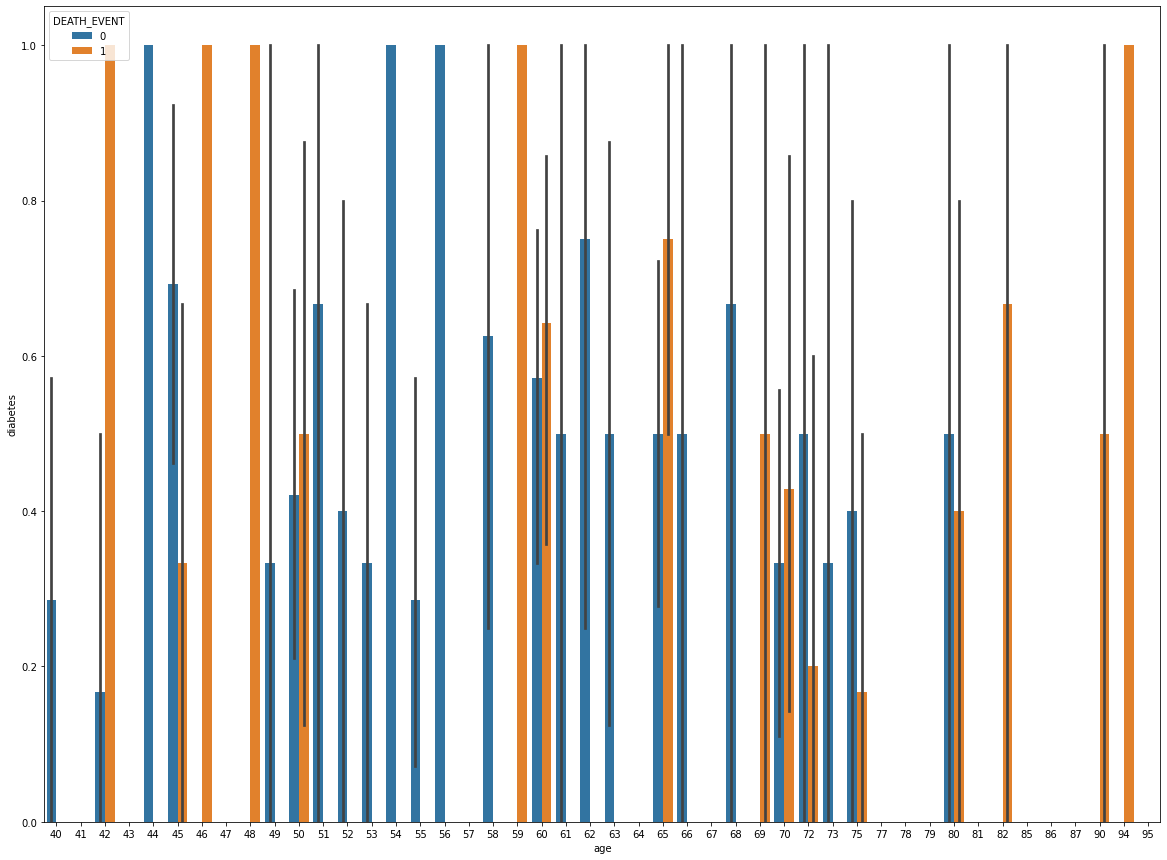

In [51]:
plt.figure(figsize=(20,15))
sns.barplot(data=df,x='age',y="diabetes", hue="DEATH_EVENT")

* Sebaran data skor diabetes cukup merata dan bisa terlihat pada umur tertentu, terutama pada umur diatas 80, kemungkinan orang selamat dari CVDs semakin kecil ketika memiliki diabetes
* Tidak dapat ditarik kesimpulan berarti pada hubungan antara age dan diabetes mengingat sebaran data dan death even yg cukup merata

In [52]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Scatterplot creatinine_phosphokinase

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='age'>

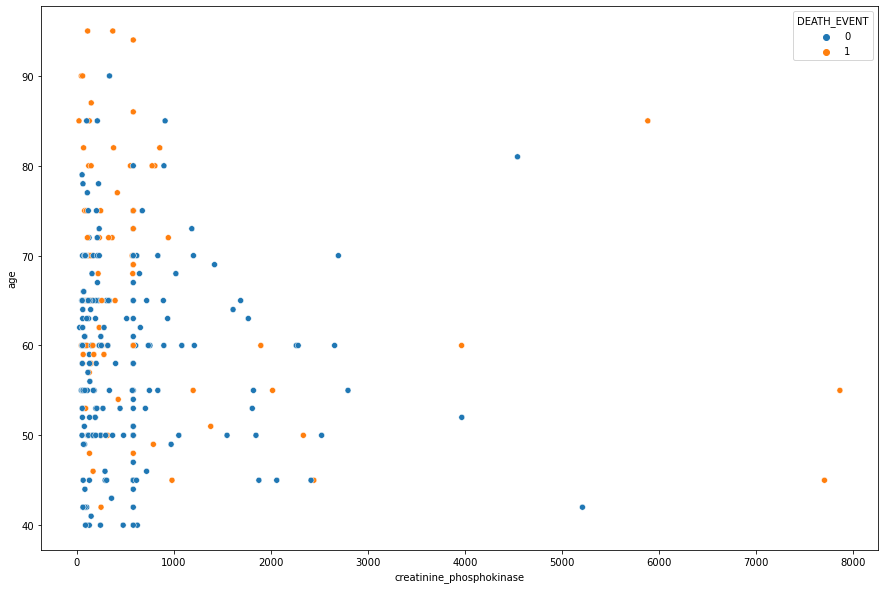

In [53]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x='creatinine_phosphokinase',y='age', hue="DEATH_EVENT")

* Dapat terlihat dengan jelas outliers yang dimaksud diatas, terdapat beberapa orang yang memiliki umur relatif lebih mudah namun memiliki angka creatinine_phosphokinase yang tinggi

# Data Preprocessing 

Tidak Diperlukan

## Analisa Korelasi Heatmap

<AxesSubplot:>

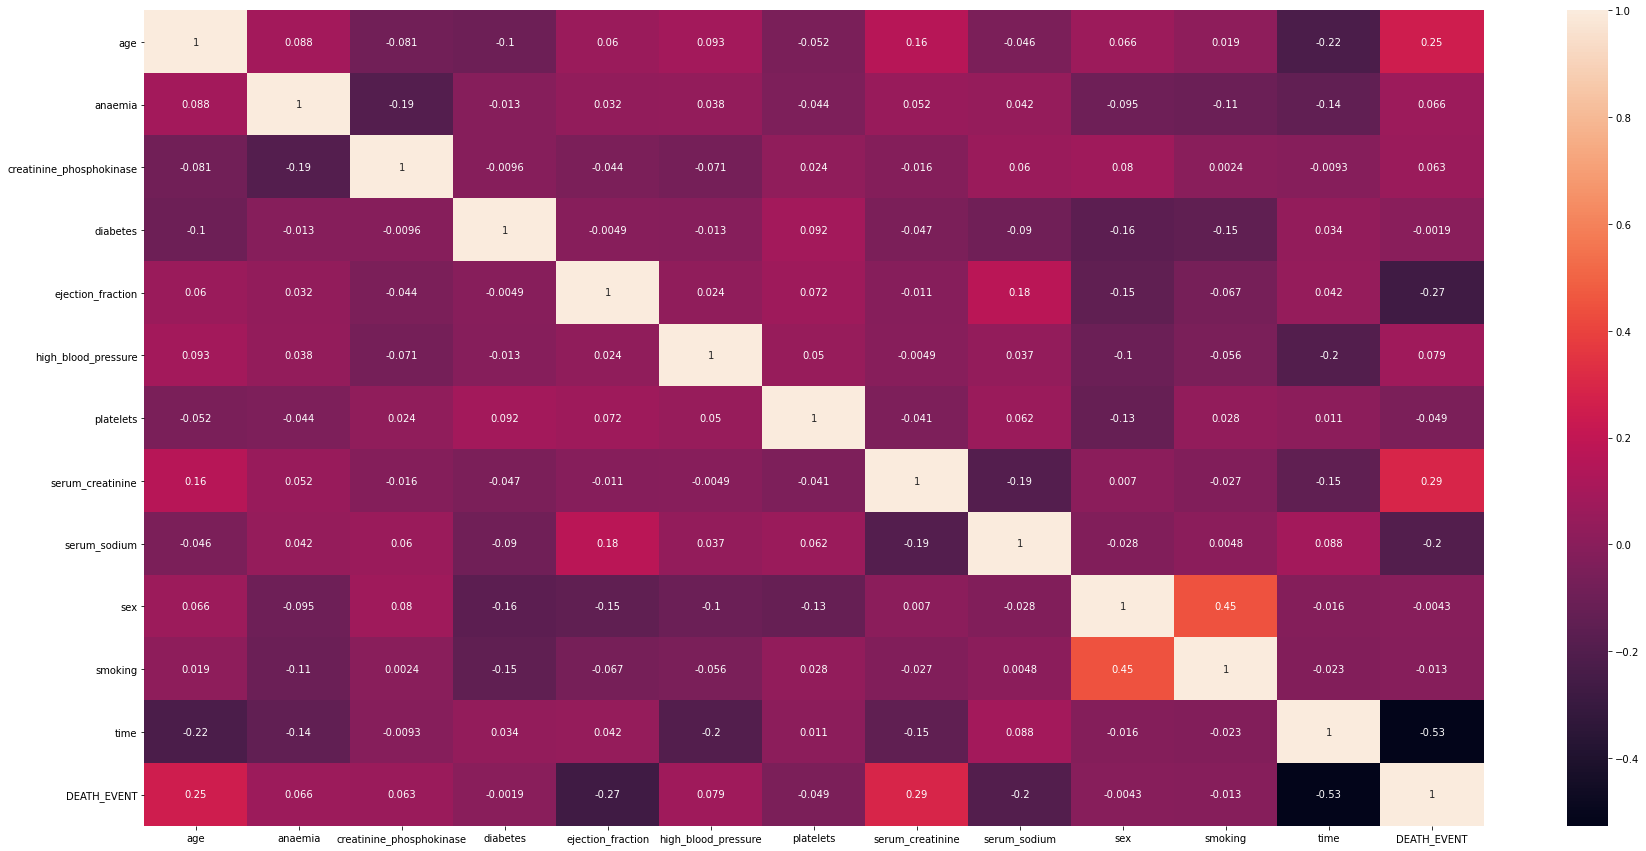

In [54]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)

## VIF

In [55]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

,feature,VIF
0,age,30.395586
1,anaemia,1.910061
2,creatinine_phosphokinase,1.458649
3,diabetes,1.793411
4,ejection_fraction,13.355186
5,high_blood_pressure,1.646737
6,platelets,8.644343
7,serum_creatinine,3.132931
8,serum_sodium,61.565950
9,sex,3.810902


## Feature selection dengan Random Forest

Dikarenakan akan dilakukan Feature Selection dengan random forest, maka akan assign Train_Test_Split akan dilakukan terlebih dahulu

In [56]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(df)
X=df.drop(['DEATH_EVENT'], axis=1)
y=df['DEATH_EVENT']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

In [57]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [58]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print('Feature yang terpilih', (selected_feat.tolist()))


Feature yang terpilih ['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time']


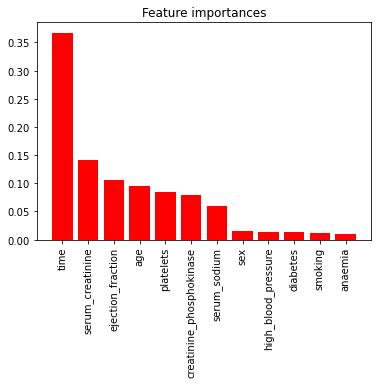

In [59]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), df.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Walaupun hasil dari Feature Importance adalah ke 4 feature diatas, namun mempertimbangkan correlation heatmap dan VIF beserta dengan hubungan analisis pada EDA maka seluruh feature tetap dipilih

# Pendefinisian Model

## Grid Search Hyperparameter

In [60]:
params=[
    {'n_estimators':[50,100],'max_depth':[4,5,6], 'max_leaf_nodes':[15,20,25], 'bootstrap' : [True, False], 'n_jobs' : [-1]},
    {'criterion':['friedman_mse','mse'],'max_features':['auto', 'sqrt', 'log2'], 'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2,3] }
]

grid=[
    GridSearchCV(RandomForestClassifier(),params[0],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(GradientBoostingClassifier(),params[1],scoring='accuracy',cv=5,n_jobs=10)
 
]

for g in grid:
    g.fit(X_train,y_train)

## Pendefinisian Model & Training

In [61]:
models=[
    RandomForestClassifier(n_estimators=grid[0].best_params_['n_estimators'],max_depth=grid[0].best_params_['max_depth'], max_leaf_nodes=grid[0].best_params_['max_leaf_nodes'], bootstrap=grid[0].best_params_['bootstrap'], n_jobs=grid[0].best_params_['n_jobs']),
    GradientBoostingClassifier(criterion=grid[1].best_params_['criterion'],max_features=grid[1].best_params_['max_features'], min_samples_split=grid[1].best_params_['min_samples_split'], min_samples_leaf=grid[1].best_params_['min_samples_leaf'])
    ]
   
for mod in models:
    mod.fit(X_train,y_train)

In [62]:
models

[RandomForestClassifier(max_depth=4, max_leaf_nodes=15, n_estimators=50,
                        n_jobs=-1),
 GradientBoostingClassifier(criterion='mse', max_features='auto',
                            min_samples_leaf=3)]

# Evaluasi Model

In [63]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,roc_auc_score,roc_curve,accuracy_score
import matplotlib.pyplot as plt

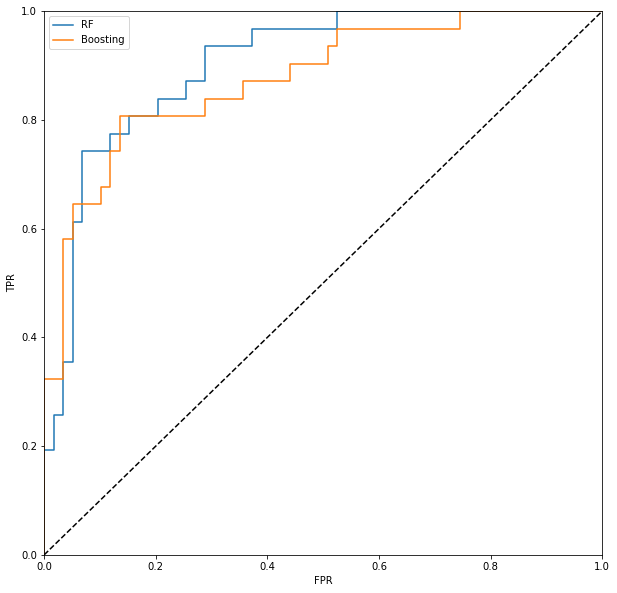

In [64]:
y_pred1=[mod.predict(X_test) for mod in models]
scores1=[mod.predict_proba(X_test)[:,1] for mod in models]
curve=[[roc_curve(y_test,score,pos_label=1)[0],roc_curve(y_test,score,pos_label=1)[1]] for score in scores1]
#roc_auc_scores=[roc_auc_score(y_pred1[i],scores1[i],multi_class='ovo') for i in range(len(models))]

class_report=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['RF','Boosting']
for i,pred in enumerate(y_pred1):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(df.DEATH_EVENT.unique())):
        class_report['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=plt.subplots(figsize=(10,10))
for i in range(len(models)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()

In [65]:
class_report.transpose()

,precision,recall,f1,support
RF_0,0.859375,0.932203,0.894309,59.0
RF_1,0.846154,0.709677,0.771930,31.0
Boosting_0,0.838710,0.881356,0.859504,59.0
Boosting_1,0.750000,0.677419,0.711864,31.0


# Cross Validation

In [66]:
from sklearn.model_selection import KFold

In [67]:
kf=KFold(n_splits=10)

In [68]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
for mod in models:
    z = cross_val_score(mod, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (np.mean(z), np.std(z)))
    

Accuracy: 0.833 (0.086)
Accuracy: 0.816 (0.049)


# Model Inference

In [69]:
df_inf = pd.read_csv('heart_failure_clinical_records_dataset(inference).csv')

In [70]:
X_inf = df_inf.drop(['DEATH_EVENT'], axis=1)
X_inf=scaler.fit_transform(X_inf)

In [71]:
for mod in models:
    hasil = mod.predict(X_inf)
    if hasil == 1:
        print('Death Event')
    else:
        print('Not Death')

Death Event
Death Event


Keduanya berhasil menebak Death Event 

# Kesimpulan

> ### Analisis dari model diatas adalah sebagai berikut
<ol>
<li>Random Forest memiliki performance lebih baik dikarenakan adanya skewness pada beberapa fitur yang digunakan, sesuai dugaan boosting memiliki sensitifitas pada feature yang memiliki nilai outlier</li>
<li>Boosting memiliki performa buruk terhadap outlier dikarenakan boosting melakukan putusan atas hasil berdasarkan "tree" yang telah dibangun sebelumnya dan berpotensi memiliki residual/error. Outlier akan memiliki jumlah residual yang lebih besar dibandingkan dengan non-outlier, sehingga gradient boosting akan fokus kepada jumlah yang tidak proporsional pada titik/nilai tersebut </li>
<li>secara umum akurasi dapat ditingkatkan apabila dilakukan pengolahan lebih lanjut terhadap dataset utamanya terhadap ke-4 data yang memiliki extreme data outlier dan apabila dilakukan proses resampling</li>
<li>label imbalance mengakibatkan proporsi jumlah support yang tidak seimbang, mengakibatkan skor dari precision dan recall antar class tidak seimbang tergantung dari random state yang dipilih, dalam model real hal ini tentu saja mengakibatkan model tidak reliable karena condong ke class yang memiliki jumlah data lebih besar
<li>dataset tetap dilakukan proses resampling dikarenakan meningkatkan akurasi (?) kemungkinan dikarenakan model lebih mudah memahami data </li>
<ol/>